# Understanding Descriptive Statistics

Import the necessary libraries here:

In [214]:
import random
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [104]:
# your code here
def roll_dice(num):
    dice_rolls = [random.choice(range(1,7,1)) for i in range(0, num, 1)]
    return sorted(dice_rolls)
outcomes = pd.DataFrame(roll_dice(10))
outcomes

,0
0,1
1,1
2,1
3,1
4,2
5,3
6,4
7,4
8,6
9,6


#### 2.- Plot the results sorted by value.

<BarContainer object of 10 artists>

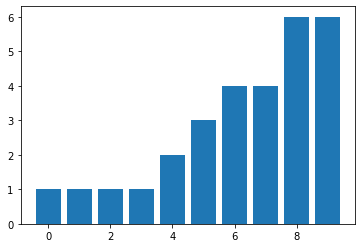

In [211]:
plt.bar(x=outcomes.index, height= outcomes[0])

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

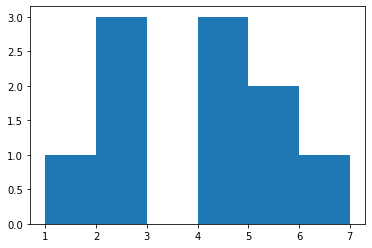

In [100]:
plt.hist(outcomes[0], bins=[1,2,3,4,5,6,7])
plt.show()

In [ ]:
"""

"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [106]:
def find_mean(lst):
    return sum(lst)/len(lst)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [125]:
roll_lst = roll_dice(10)
find_mean(roll_lst)

[1, 1, 1, 2, 2, 3, 4, 4, 5, 6]

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [126]:
def find_median(lst):
    half = len(lst)//2
    split_lst = lst[:half], lst[half:]
    if len(split_lst[0]) == len(split_lst[1]):
        return (split_lst[0][-1]+split_lst[1][0])/2
    else:
        return split_lst[1][0]

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [190]:
def find_quarts(lst):       
    half = len(lst)//2
    split_lst = lst[:half], lst[half:]
    print("1st Quartile: ", [find_median(i) for i in split_lst][0])
    print("2nd Quartile: ", find_median(lst))
    print("3rd Quartile: ", [find_median(i) for i in split_lst][1])
    print("4th Quartile: ", split_lst[1][-1])  
    
find_quarts(roll_lst)

1st Quartile:  1
2nd Quartile:  2.5
3rd Quartile:  4
4th Quartile:  6


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

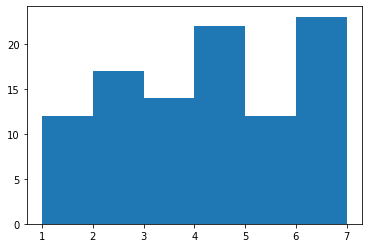

In [209]:
roll_data = pd.read_csv('../data/roll_the_dice_hundred.csv')
roll_data.sort_values('value')
plt.hist(roll_data['value'], bins=[1,2,3,4,5,6,7])

plt.show()

In [ ]:
"""
Most rolls were 6, least values were 5 and 1.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [204]:
find_mean(list(roll_data['value']))

3.74

#### 3.- Now, calculate the frequency distribution.


In [ ]:
plt.hist(roll_data['value'], bins=[1,2,3,4,5,6,7])
plt.show()

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [ ]:
plt.hist(roll_data['value'], bins=[1,2,3,4,5,6,7])
plt.show()

In [ ]:
"""
The mean is weighted towards the right side of the graph, because there buckets 4 and 6 are the largest.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

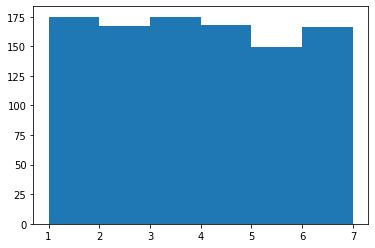

In [205]:
roll_data_1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')
plt.hist(roll_data_1000['value'], bins=[1,2,3,4,5,6,7])
plt.show()

In [ ]:
"""
There is more equal distribution. The more dice rolls there are, the greater the likelyhood of bins being equal. 
This is because there is an equal probability for each outcome. 
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

(array([ 77., 191., 308., 257., 114.,  32.,   3.,   1.]),
 array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 8 Patch objects>)

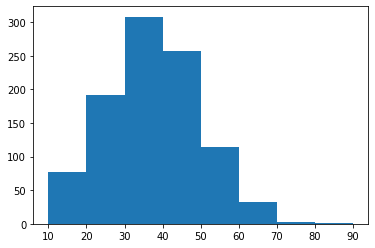

In [229]:
ages_pop = pd.read_csv('../data/ages_population.csv')
plt.hist(ages_pop['observation'], bins=[10,20,30,40,50,60,70,80,90])
# estimate of mean: 40
# estimate of std: 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [217]:
print("Mean: ", np.mean(ages_pop))
print("STD: ", np.std(ages_pop))

Mean:  observation    36.56
dtype: float64
STD:  observation    12.81009
dtype: float64


In [ ]:
"""
Difference between estimates and actual: mean = 3.44, std = 2.81.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

(array([  3., 184., 597., 211.,   5.,   0.]),
 array([15, 20, 25, 30, 35, 40, 45]),
 <a list of 6 Patch objects>)

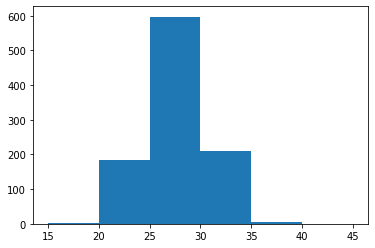

In [232]:
ages_pop2 = pd.read_csv('../data/ages_population2.csv')
plt.hist(ages_pop2['observation'], bins=[15,20,25,30,35,40,45])

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
More concentrated around the centre, less range of ages. 
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [237]:
print("Mean: ", np.mean(ages_pop2))
print("STD: ", np.std(ages_pop2))

Mean:  observation    27.155
dtype: float64
STD:  observation    2.968329
dtype: float64


In [ ]:
"""
Suggests data is more concentrated around the centre. 
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


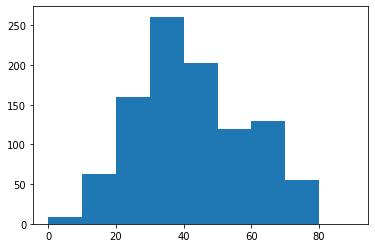

In [240]:
ages_pop3 = pd.read_csv('../data/ages_population3.csv')
plt.hist(ages_pop3['observation'], bins=[0,10,20,30,40,50,60,70,80,90])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [238]:
print("Mean: ", np.mean(ages_pop3))
print("STD: ", np.std(ages_pop3))

Mean:  observation    41.989
dtype: float64
STD:  observation    16.136632
dtype: float64


In [ ]:
"""
Average age is increasing, and deviation from the mean is increasing, which means a broader range of ages. 
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [246]:
ages_pop3 = ages_pop3.sort_values('observation')
find_quarts(list(ages_pop3['observation']))

1st Quartile:  30.0
2nd Quartile:  40.0
3rd Quartile:  53.0
4th Quartile:  77.0


In [ ]:
"""
Difference is 1.989
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [253]:
print(ages_pop3.quantile(0.10))
print(ages_pop3.quantile(0.20))
print(ages_pop3.quantile(0.30))
print(ages_pop3.quantile(0.40))
print(ages_pop3.quantile(0.50))
print(ages_pop3.quantile(0.60))
print(ages_pop3.quantile(0.70))
print(ages_pop3.quantile(0.80))
print(ages_pop3.quantile(0.90))
print(ages_pop3.quantile(1))

observation    22.0
Name: 0.1, dtype: float64
observation    28.0
Name: 0.2, dtype: float64
observation    32.0
Name: 0.3, dtype: float64
observation    36.0
Name: 0.4, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    45.0
Name: 0.6, dtype: float64
observation    50.0
Name: 0.7, dtype: float64
observation    57.0
Name: 0.8, dtype: float64
observation    67.0
Name: 0.9, dtype: float64
observation    77.0
Name: 1, dtype: float64


In [254]:
"""
The differences between the central quartiles is smaller than those on the edge.
"""

'\nThe differences between the central quartiles is smaller than those on the edge.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""